In [2]:
import pickle

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [3]:
import numpy as np 

X = np.array(X)   
y = np.array(y)

In [4]:
len(X)

4441

In [5]:
len(y)

4441

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(170, 170, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Train on 3552 samples, validate on 889 samples
Epoch 1/15
3552/3552 [==============================] - 124s 35ms/sample - loss: 4.5067 - accuracy: 0.6700 - val_loss: 0.3531 - val_accuracy: 0.8583
Epoch 2/15
3552/3552 [==============================] - 120s 34ms/sample - loss: 0.3913 - accuracy: 0.8415 - val_loss: 0.2609 - val_accuracy: 0.9055
Epoch 3/15
3552/3552 [==============================] - 90s 25ms/sample - loss: 0.2878 - accuracy: 0.8905 - val_loss: 0.2397 - val_accuracy: 0.8954
Epoch 4/15
3552/3552 [==============================] - 89s 25ms/sample - loss: 0.2571 - accuracy: 0.8995 - val_loss: 0.2247 - val_accuracy: 0.9111
Epoch 5/15
3552/3552 [==============================] - 91s 26ms/sample - loss: 0.2482 - accuracy: 0.9034 - val_loss: 0.1972 - val_accuracy: 0.9291
Epoch 6/15
3552/3552 [==============================] - 88s 25ms/sample - loss: 0.1979 - accuracy: 0.9155 - val_loss: 0.2198 - val_accuracy: 0.9179
Epoch 7/15
3552/3552 [==============================] - 91s 26m

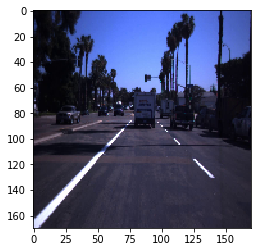

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[11])
plt.show()

In [11]:
predictions = model.predict(X_test)
np.argmax(predictions[11])

2

In [12]:
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [13]:
model.save("CNN.model")